# Matplotlib e Pandas

O Pandas é uma biblioteca que permite a manipulação de dados de forma simples e eficiente. Ela é construída sobre o NumPy e permite a manipulação de dados de forma simples e eficiente. Quanto a gráficos, o Pandas utiliza o Matplotlib como base para a geração de gráficos.



## Base de dados utilizada

Para este notebook, utilizaremos a base de dados do top 10 IBOV de maio a agosto de 2023. A base de dados foi obtida no site do Yahoo Finance. O IBOV é o índice da Bovespa, que é a bolsa de valores brasileira. O IBOV é composto pelas ações mais negociadas na bolsa de valores brasileira. Para compor o IBOV, é feito um cálculo de ponderação das ações, onde as ações mais negociadas possuem maior peso no índice. O IBOV é um índice que é utilizado para medir o desempenho médio das cotações das ações mais negociadas na bolsa de valores brasileira.

Este material é didático e não tem como objetivo a recomendação de compra ou venda de ativos.

In [1]:
import numpy as np
import pandas as pd

ARQUIVO_TOP_10_IBOV = 'top_10_ibov_mai_ago_2023.csv'

df_top_10_ibov = pd.read_csv(ARQUIVO_TOP_10_IBOV)
df_top_10_ibov['Date'] = pd.to_datetime(df_top_10_ibov['Date'], format='%Y-%m-%d')
df_top_10_ibov = df_top_10_ibov.set_index('Date', drop=True)
df_top_10_ibov.head()

,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
Date,,,,,,,,,,
2023-01-02,87.478874,40.327332,31.615412,12.039818,14.19,23.893169,13.879215,37.771538,22.264847,50.636215
2023-01-03,87.322311,39.572250,31.026070,11.636853,14.17,23.395597,13.190460,36.829731,21.950058,49.391312
2023-01-04,87.478874,40.635326,31.425303,11.725308,14.25,23.463890,13.228148,37.077576,22.315893,49.974247
2023-01-05,88.946640,40.714806,32.860638,12.088961,14.29,24.195612,13.802876,37.156883,23.039053,50.389210
2023-01-06,90.355698,40.734676,33.316906,12.373984,14.32,24.615131,14.189168,37.702141,22.894421,51.347595


In [2]:
df_top_10_ibov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2023-01-02 to 2023-06-29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALE3   123 non-null    float64
 1   ELET3   123 non-null    float64
 2   BBAS3   123 non-null    float64
 3   B3SA3   123 non-null    float64
 4   ABEV3   123 non-null    float64
 5   ITUB4   123 non-null    float64
 6   BBDC4   123 non-null    float64
 7   WEGE3   123 non-null    float64
 8   PETR3   123 non-null    float64
 9   RENT3   123 non-null    float64
dtypes: float64(10)
memory usage: 10.6 KB


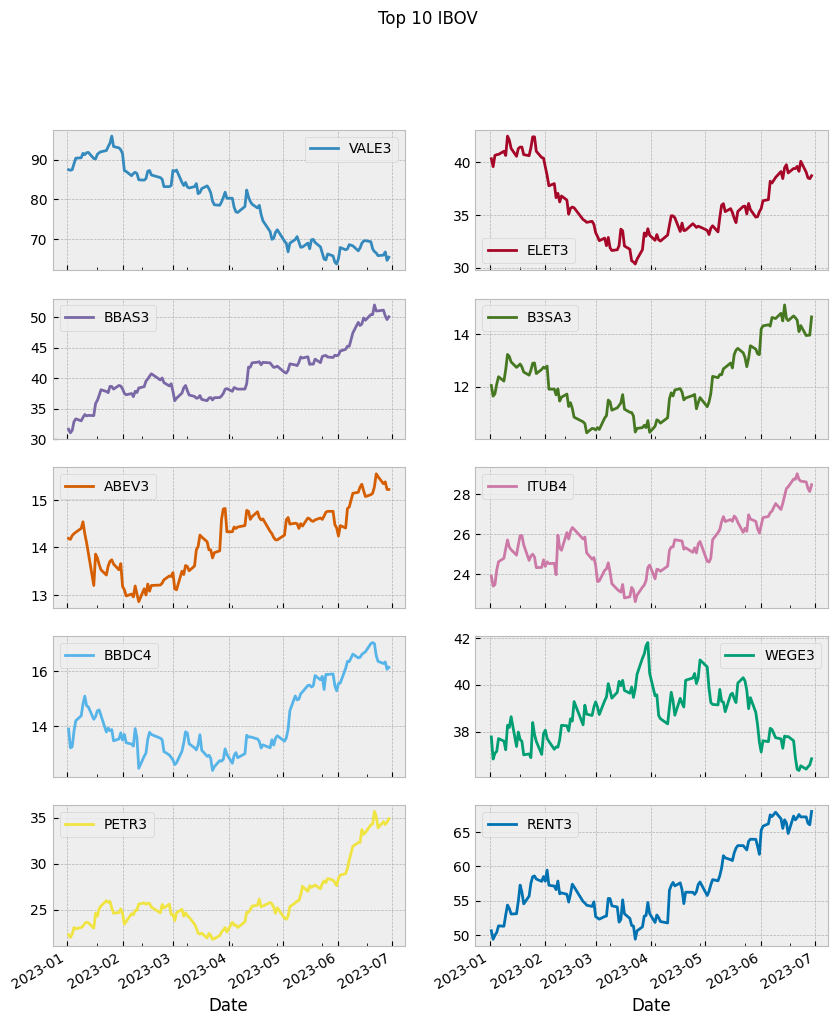

In [3]:
import matplotlib.pyplot as plt

plt.style.use('bmh')

df_top_10_ibov.plot(figsize=(10, 12), title='Top 10 IBOV', subplots=True, layout=(5, 2))
plt.show()

In [4]:
variacao_diaria = df_top_10_ibov.pct_change()
variacao_diaria.head()

,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
Date,,,,,,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03,-0.001790,-0.018724,-0.018641,-0.033469,-0.001409,-0.020825,-0.049625,-0.024934,-0.014138,-0.024585
2023-01-04,0.001793,0.026864,0.012868,0.007601,0.005646,0.002919,0.002857,0.006729,0.016667,0.011802
2023-01-05,0.016779,0.001956,0.045675,0.031014,0.002807,0.031185,0.043447,0.002139,0.032406,0.008304
2023-01-06,0.015842,0.000488,0.013885,0.023577,0.002099,0.017339,0.027986,0.014674,-0.006278,0.019020


In [5]:
from itertools import combinations

bancos = ['BBDC4', 'ITUB4', 'BBAS3']
pares_bancos = list(combinations(bancos, 2))
pares_bancos

[('BBDC4', 'ITUB4'), ('BBDC4', 'BBAS3'), ('ITUB4', 'BBAS3')]

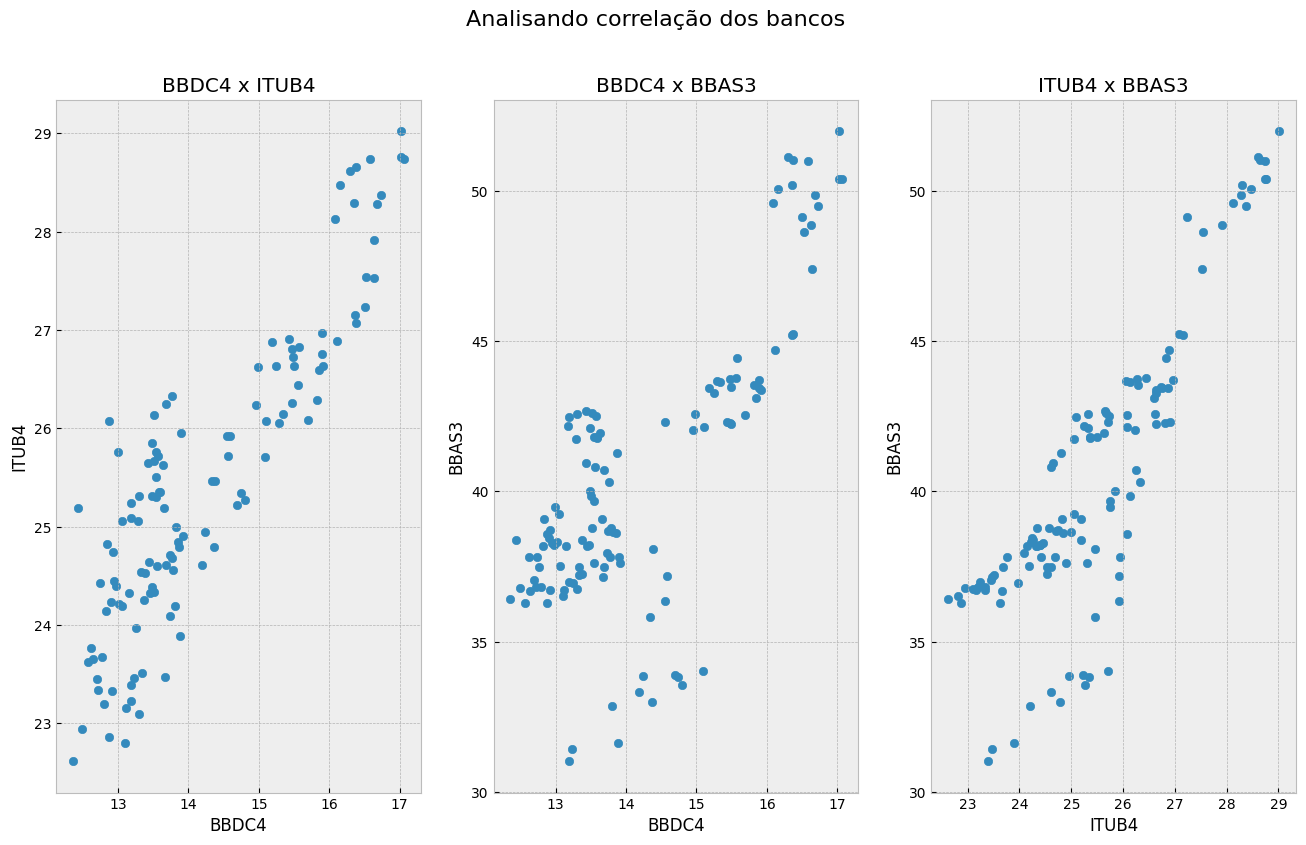

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 9))

for i, par in enumerate(pares_bancos):
    axs[i].scatter(par[0], par[1], data=df_top_10_ibov)
    axs[i].set_title(f'{par[0]} x {par[1]}')
    axs[i].set_xlabel(par[0])
    axs[i].set_ylabel(par[1])

fig.suptitle('Analisando correlação dos bancos', fontsize=16)

plt.show()

Podemos verificar que existe uma correlação positiva entre os pares de ações de bancos. Isso significa que quando uma ação sobe, a outra também sobe. Quando uma ação cai, a outra também cai. Isso é um indicativo de que existe uma correlação entre as ações de bancos. A correlação é uma medida estatística que indica a relação entre duas variáveis. A correlação pode ser positiva, negativa ou neutra. Quando a correlação é positiva, significa que as variáveis possuem uma relação direta. Quando uma variável aumenta, a outra também aumenta. Quando a correlação é negativa, significa que as variáveis possuem uma relação inversa. Quando uma variável aumenta, a outra diminui. Quando a correlação é neutra, significa que as variáveis não possuem relação entre si.

Os valores da correlação variam entre -1 e 1. Quando a correlação é -1, significa que as variáveis possuem uma correlação negativa perfeita. Quando a correlação é 1, significa que as variáveis possuem uma correlação positiva perfeita. Quando a correlação é 0, significa que as variáveis não possuem correlação. Quanto mais próximo de 1 ou -1, mais forte é a correlação. Quanto mais próximo de 0, mais fraca é a correlação.

O método `corr()` do Pandas calcula a correlação entre as variáveis de um DataFrame.

In [7]:
df_top_10_ibov.corr()

,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
VALE3,1.000000,0.254017,-0.801388,-0.472413,-0.733513,-0.616604,-0.630104,-0.114228,-0.649903,-0.699430
ELET3,0.254017,1.000000,0.072803,0.641147,0.089652,0.421773,0.476954,-0.748048,0.350004,0.331517
BBAS3,-0.801388,0.072803,1.000000,0.665027,0.666072,0.858388,0.753427,-0.213368,0.924637,0.895541
B3SA3,-0.472413,0.641147,0.665027,1.000000,0.576847,0.806739,0.932840,-0.575233,0.805945,0.864826
ABEV3,-0.733513,0.089652,0.666072,0.576847,1.000000,0.573089,0.670614,-0.033395,0.614360,0.582085
ITUB4,-0.616604,0.421773,0.858388,0.806739,0.573089,1.000000,0.883379,-0.450325,0.917005,0.892079
BBDC4,-0.630104,0.476954,0.753427,0.932840,0.670614,0.883379,1.000000,-0.443264,0.856235,0.888734
WEGE3,-0.114228,-0.748048,-0.213368,-0.575233,-0.033395,-0.450325,-0.443264,1.000000,-0.479820,-0.377449
PETR3,-0.649903,0.350004,0.924637,0.805945,0.614360,0.917005,0.856235,-0.479820,1.000000,0.912472
RENT3,-0.699430,0.331517,0.895541,0.864826,0.582085,0.892079,0.888734,-0.377449,0.912472,1.000000


Podemos aplicar um estilo de gradiente de cores para facilitar a visualização da correlação. No Pandas, há o método `style.background_gradient()`, que aplica um estilo de gradiente de cores no DataFrame. O parâmetro `cmap` recebe o nome do estilo de gradiente de cores. Neste caso, utilizaremos o estilo `coolwarm_r`, que é um estilo de gradiente de cores que vai do vermelho ao azul. O sufixo `_r` indica que o gradiente de cores será aplicado de forma reversa, ou seja, o gradiente original é de azul ao vermelho.

Os mapas de cores são os disponíveis no Matplotlib. Para mais informações, acesse a [documentação](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [12]:
!pip install jinja2

Defaulting to user installation because normal site-packages is not writeable


In [23]:
df_top_10_ibov.corr().style.format(precision=2).background_gradient(cmap='coolwarm')

,VALE3,ELET3,BBAS3,B3SA3,ABEV3,ITUB4,BBDC4,WEGE3,PETR3,RENT3
VALE3,1.00,0.25,-0.80,-0.47,-0.73,-0.62,-0.63,-0.11,-0.65,-0.70
ELET3,0.25,1.00,0.07,0.64,0.09,0.42,0.48,-0.75,0.35,0.33
BBAS3,-0.80,0.07,1.00,0.67,0.67,0.86,0.75,-0.21,0.92,0.90
B3SA3,-0.47,0.64,0.67,1.00,0.58,0.81,0.93,-0.58,0.81,0.86
ABEV3,-0.73,0.09,0.67,0.58,1.00,0.57,0.67,-0.03,0.61,0.58
ITUB4,-0.62,0.42,0.86,0.81,0.57,1.00,0.88,-0.45,0.92,0.89
BBDC4,-0.63,0.48,0.75,0.93,0.67,0.88,1.00,-0.44,0.86,0.89
WEGE3,-0.11,-0.75,-0.21,-0.58,-0.03,-0.45,-0.44,1.00,-0.48,-0.38
PETR3,-0.65,0.35,0.92,0.81,0.61,0.92,0.86,-0.48,1.00,0.91
RENT3,-0.70,0.33,0.90,0.86,0.58,0.89,0.89,-0.38,0.91,1.00


In [18]:
df_top_10_ibov[bancos].corr().style.format(precision=2).background_gradient(cmap='coolwarm_r', vmin=-0.5, vmax=1)

,BBDC4,ITUB4,BBAS3
BBDC4,1.00,0.88,0.75
ITUB4,0.88,1.00,0.86
BBAS3,0.75,0.86,1.00


In [19]:
df_top_10_ibov.loc[:, ~df_top_10_ibov.columns.isin(bancos)].corr().style.format(precision=2).background_gradient(cmap='coolwarm_r', vmin=-0.5, vmax=1)

,VALE3,ELET3,B3SA3,ABEV3,WEGE3,PETR3,RENT3
VALE3,1.00,0.25,-0.47,-0.73,-0.11,-0.65,-0.70
ELET3,0.25,1.00,0.64,0.09,-0.75,0.35,0.33
B3SA3,-0.47,0.64,1.00,0.58,-0.58,0.81,0.86
ABEV3,-0.73,0.09,0.58,1.00,-0.03,0.61,0.58
WEGE3,-0.11,-0.75,-0.58,-0.03,1.00,-0.48,-0.38
PETR3,-0.65,0.35,0.81,0.61,-0.48,1.00,0.91
RENT3,-0.70,0.33,0.86,0.58,-0.38,0.91,1.00


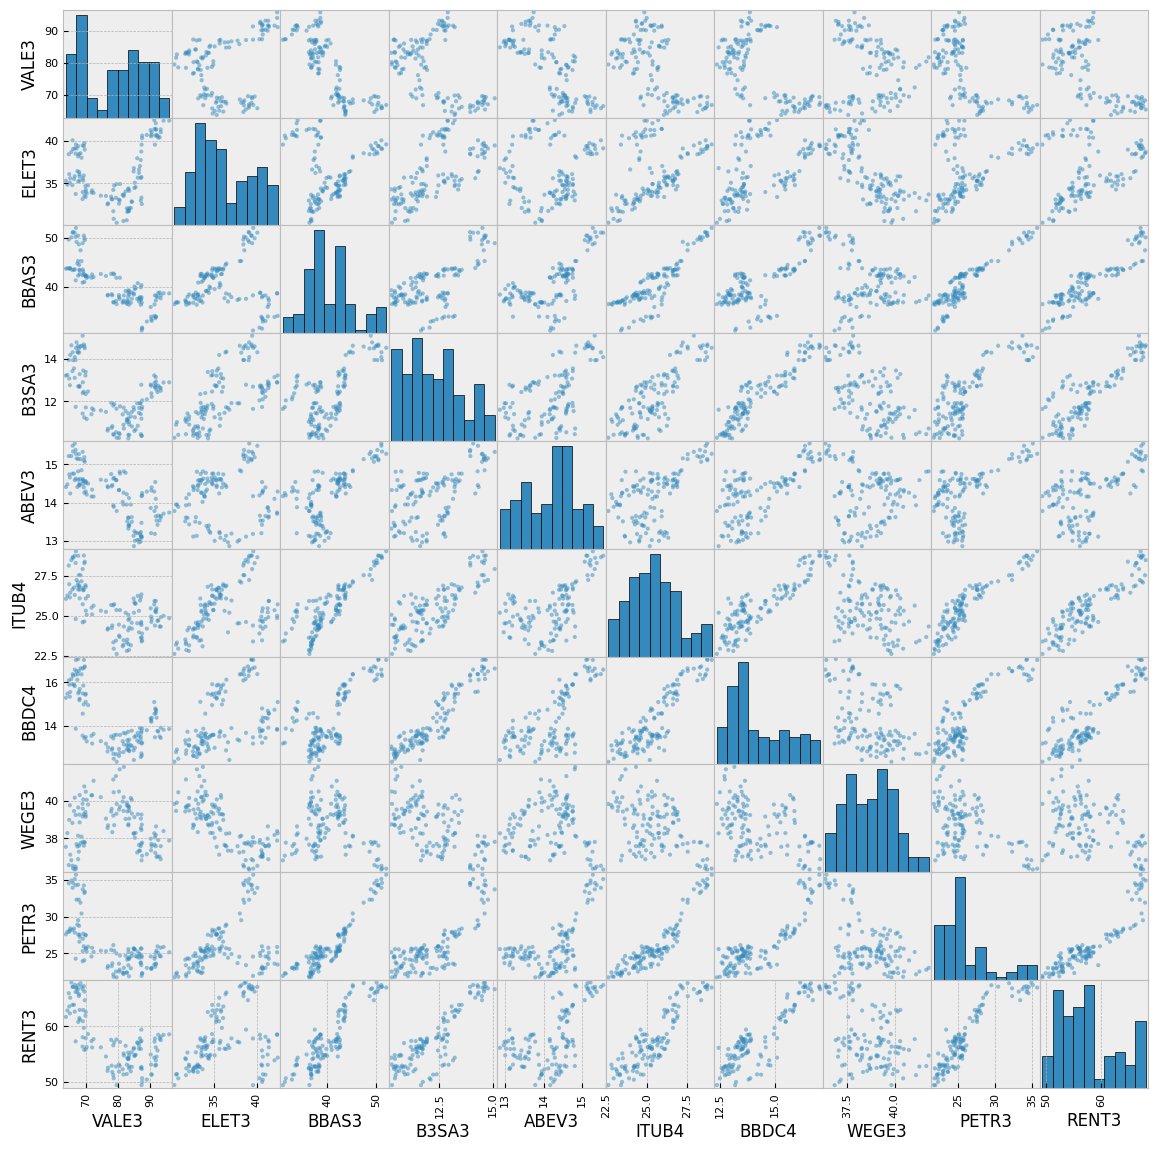

In [27]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_top_10_ibov, figsize=(14, 14), hist_kwds={'bins':10, 'edgecolor': 'Black'});

In [25]:
df_top_10_ibov['VALE3'].value_counts(bins=10).sort_index()

(63.777, 67.018]    16
(67.018, 70.227]    26
(70.227, 73.435]     5
(73.435, 76.644]     2
(76.644, 79.852]    12
(79.852, 83.06]     12
(83.06, 86.269]     17
(86.269, 89.477]    14
(89.477, 92.686]    14
(92.686, 95.894]     5
Name: count, dtype: int64